In [2]:
import kagglehub
path = kagglehub.dataset_download("kunalgupta2616/dog-vs-cat-images-data")
print(path)

c:\Users\Venkateswaran K\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 991M/991M [05:01<00:00, 3.44MB/s]  

Extracting files...


C:\Users\Venkateswaran K\.cache\kagglehub\datasets\kunalgupta2616\dog-vs-cat-images-data\versions\1


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "dogcat/train"
val_dir   = "dogcat/validation"


print(train_dir)
print(val_dir)

dogcat/train
dogcat/validation


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixels
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)


In [5]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 25000 images belonging to 2 classes.


In [7]:
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

c:\Users\Venkateswaran K\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15
)


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 429s 548ms/step - accuracy: 0.6476 - loss: 0.6247 - val_accuracy: 0.7120 - val_loss: 0.5596
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 169s 216ms/step - accuracy: 0.7164 - loss: 0.5520 - val_accuracy: 0.7556 - val_loss: 0.4925
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.7446 - loss: 0.5164 - val_accuracy: 0.7794 - val_loss: 0.4630
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.7617 - loss: 0.4903 - val_accuracy: 0.7790 - val_loss: 0.4547
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.7776 - loss: 0.4696 - val_accuracy: 0.8049 - val_loss: 0.4157
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.7874 - loss: 0.4520 - val_accuracy: 0.8115 - val_loss: 0.4033
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.7946 - loss: 0.4412 - val_accuracy: 0.8273 - val_loss: 0.3794
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.8069 - loss: 0.424

{'accuracy': [0.6476399898529053, 0.7164000272750854, 0.7445999979972839, 0.761680006980896, 0.7776399850845337, 0.7874400019645691, 0.7945600152015686, 0.806879997253418, 0.8098000288009644, 0.8122000098228455, 0.8198800086975098, 0.8246399760246277, 0.8245599865913391, 0.8240000009536743, 0.8312399983406067], 'loss': [0.6246949434280396, 0.5520458817481995, 0.5163908004760742, 0.4903362989425659, 0.46961402893066406, 0.45196717977523804, 0.44116485118865967, 0.424641877412796, 0.4148341715335846, 0.41097909212112427, 0.40196937322616577, 0.3903294801712036, 0.3895285129547119, 0.3851001560688019, 0.376084566116333], 'val_accuracy': [0.7120000123977661, 0.7556250095367432, 0.7793750166893005, 0.7789999842643738, 0.8048750162124634, 0.8115000128746033, 0.8272500038146973, 0.8237500190734863, 0.8342499732971191, 0.8486250042915344, 0.8396250009536743, 0.8448749780654907, 0.8512499928474426, 0.8502500057220459, 0.8172500133514404], 'val_loss': [0.5596455931663513, 0.49254709482192993, 0.

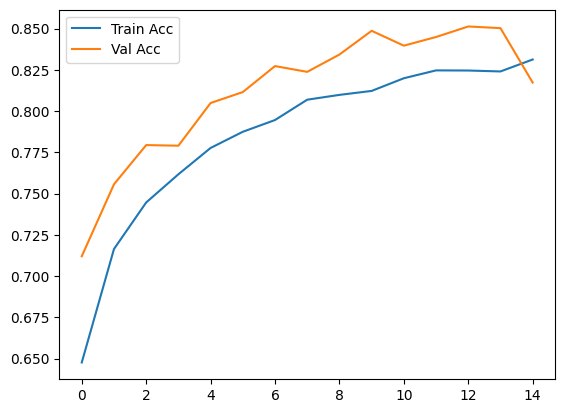

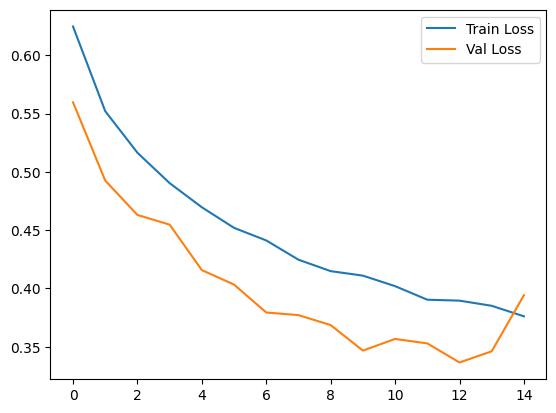

In [12]:
import matplotlib.pyplot as plt

# Accuracy
print(history.history)
print(history.history['accuracy'])
print(history.history['val_accuracy'])
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


In [13]:
# Save model in HDF5 format
model.save("model_windows_15epoch.h5")
print("Model saved successfully!")


Model saved successfully!


In [14]:

from tensorflow.keras.models import load_model
image_model = load_model("model_windows_15epoch.h5")
if image_model:print("model loaded successfully")

model loaded successfully


model loaded successfully


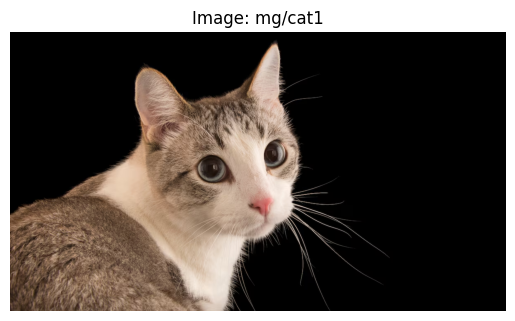

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
The image was predicted as Cat




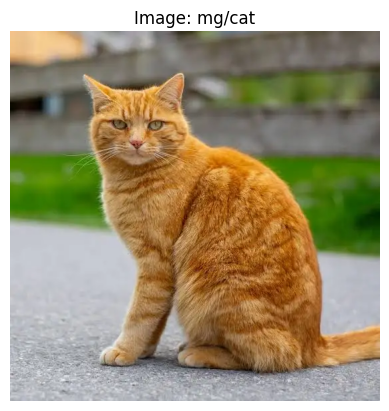

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The image was predicted as Dog




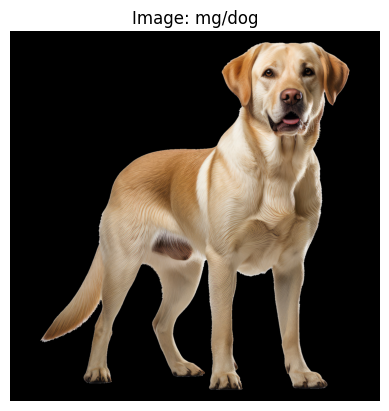

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The image was predicted as Dog




In [26]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

import numpy as np
from tensorflow.keras.models import load_model
image_model = load_model("model_vscode_10epoch.h5")
if image_model:print("model loaded successfully")

l=["img/cat1.png","img/cat.png","img/dog.png"]
for i in l:

  img_path = i

  img = image.load_img(img_path, target_size=(64,64))
  img_display = image.load_img(img_path)
  plt.imshow(img_display)
  plt.axis('off')
  t=i[1:]
  t=t[:-4]
  plt.title(f"Image: {t}")
  plt.show()
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0


  prediction = image_model.predict(img_array)
  if prediction[0][0] > 0.5:
      print("The image was predicted as Dog\n\n")
  else:
      print("The image was predicted as Cat\n\n")
